# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# A Visual Comparison Between Locality and Density-based Clustering

Post Link: [Substack](https://avichawla.substack.com/p/a-visual-comparison-between-locality)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:activity:7044624003235258368/)

Twitter Post: [Twitter](https://twitter.com/_avichawla/status/1638858278858833921)

In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, mixture
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)
sns.set()

In [2]:
plt.rcParams['font.family'] = ['Times New Roman', 'sans-serif']
colors = [ '#FF7051', '#00B9FF', '#46C7C7']

In [3]:
n_samples = 500
dataset_a = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
dataset_b = datasets.make_moons(n_samples=n_samples, noise=0.05)
dataset_c = datasets.make_blobs(n_samples=n_samples, random_state=8)

In [4]:
# Define the number of data points
N = 500

# Define the two spiral arms
theta = np.sqrt(np.random.rand(N)) * 2 * np.pi  # angle
r_a = 2 * theta + np.pi + 2*np.random.rand(N) # radius for arm a
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
r_b = -2 * theta - np.pi + 2*np.random.rand(N) # radius for arm b
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T

# Concatenate the two arms
data = np.concatenate((data_a, data_b))

# Create the target labels
labels = np.concatenate((np.ones(N), np.zeros(N))).astype(int)

# Shuffle the data and labels in unison
indices = np.random.permutation(N * 2)
data, labels = data[indices], labels[indices]
dataset_d = (data, labels)

Text(0.5, 1.0, 'Dataset D')

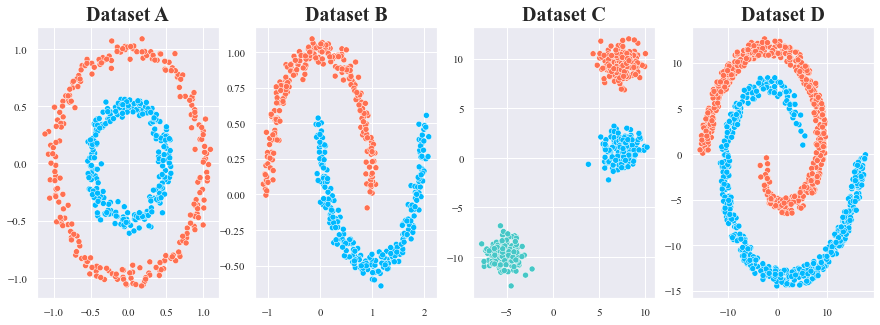

In [5]:
fig, axes = plt.subplots(1,4, figsize=(15, 5))

ax1 = sns.scatterplot(dataset_a[0][:, 0], dataset_a[0][:, 1], ax = axes[0], c = [colors[label] for label in dataset_a[1]])
ax2 = sns.scatterplot(dataset_b[0][:, 0], dataset_b[0][:, 1], ax = axes[1], c = [colors[label] for label in dataset_b[1]])
ax3 = sns.scatterplot(dataset_c[0][:, 0], dataset_c[0][:, 1], ax = axes[2], c = [colors[label] for label in dataset_c[1]])
ax4 = sns.scatterplot(dataset_d[0][:, 0], dataset_d[0][:, 1], ax = axes[3], c = [colors[label] for label in dataset_d[1]])

ax1.set_title(f"Dataset A", fontsize = 20, fontweight="bold")
ax2.set_title(f"Dataset B", fontsize = 20, fontweight="bold")
ax3.set_title(f"Dataset C", fontsize = 20, fontweight="bold")
ax4.set_title(f"Dataset D", fontsize = 20, fontweight="bold")

In [6]:
def get_kmeans_labels(X, clusters, **kwargs):
    kmeans_model = KMeans(n_clusters=clusters, **kwargs).fit(X)
    return kmeans_model.labels_

def get_dbscan_labels(X, eps, **kwargs):
    dbscan_model = DBSCAN(eps=eps, **kwargs).fit(X)
    return dbscan_model.labels_

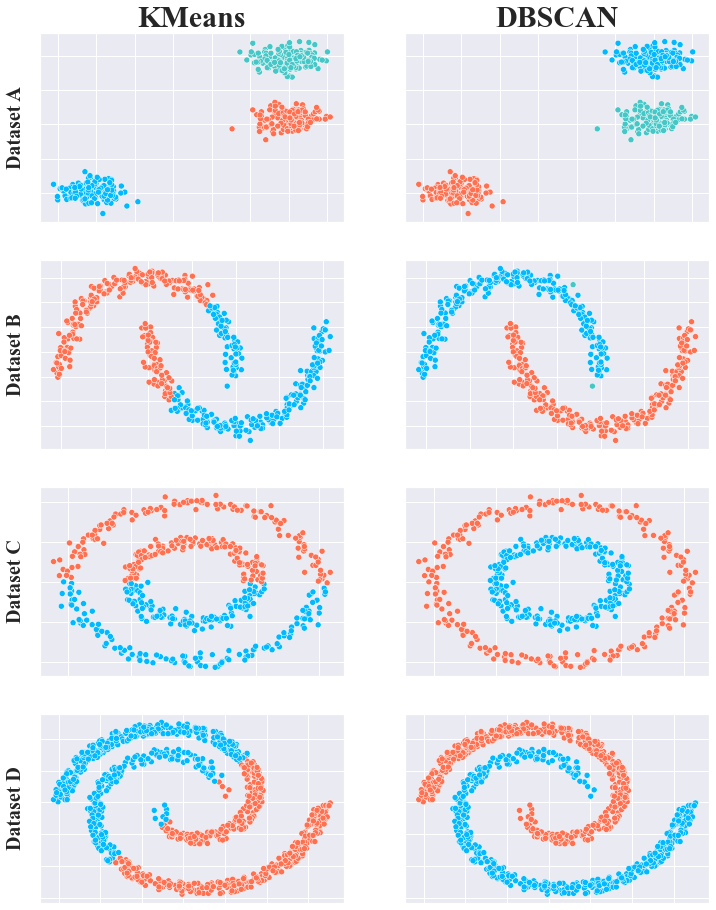

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

ax1_kmeans = sns.scatterplot(dataset_a[0][:, 0], dataset_a[0][:, 1], ax = axes[2, 0], c = [colors[label] for label in get_kmeans_labels(dataset_a[0], 2)])
ax2_kmeans = sns.scatterplot(dataset_b[0][:, 0], dataset_b[0][:, 1], ax = axes[1, 0], c = [colors[label] for label in get_kmeans_labels(dataset_b[0], 2)])
ax3_kmeans = sns.scatterplot(dataset_c[0][:, 0], dataset_c[0][:, 1], ax = axes[0, 0], c = [colors[label] for label in get_kmeans_labels(dataset_c[0], 3)])
ax4_kmeans = sns.scatterplot(dataset_d[0][:, 0], dataset_d[0][:, 1], ax = axes[3, 0], c = [colors[label] for label in get_kmeans_labels(dataset_d[0], 2)])

ax1_dbscan = sns.scatterplot(dataset_a[0][:, 0], dataset_a[0][:, 1], ax = axes[2, 1], c = [colors[label] for label in get_dbscan_labels(dataset_a[0], 0.2)])
ax2_dbscan = sns.scatterplot(dataset_b[0][:, 0], dataset_b[0][:, 1], ax = axes[1, 1], c = [colors[label] for label in get_dbscan_labels(dataset_b[0], 0.1)])
ax3_dbscan = sns.scatterplot(dataset_c[0][:, 0], dataset_c[0][:, 1], ax = axes[0, 1], c = [colors[label] for label in get_dbscan_labels(dataset_c[0], 2)])
ax4_dbscan = sns.scatterplot(dataset_d[0][:, 0], dataset_d[0][:, 1], ax = axes[3, 1], c = [colors[label] for label in get_dbscan_labels(dataset_d[0], 2)])

ax3_kmeans.set_title("KMeans", fontsize = 30, fontweight="bold")
ax3_dbscan.set_title("DBSCAN", fontsize = 30, fontweight="bold")

ax1_kmeans.set_yticklabels([])
ax2_kmeans.set_yticklabels([])
ax3_kmeans.set_yticklabels([])
ax4_kmeans.set_yticklabels([])
ax1_dbscan.set_yticklabels([])
ax2_dbscan.set_yticklabels([])
ax3_dbscan.set_yticklabels([])
ax4_dbscan.set_yticklabels([])

ax1_kmeans.set_xticklabels([])
ax2_kmeans.set_xticklabels([])
ax3_kmeans.set_xticklabels([])
ax4_kmeans.set_xticklabels([])
ax1_dbscan.set_xticklabels([])
ax2_dbscan.set_xticklabels([])
ax3_dbscan.set_xticklabels([])
ax4_dbscan.set_xticklabels([])

ax3_kmeans.set_ylabel(f"Dataset A", fontsize = 20, fontweight="bold")
ax2_kmeans.set_ylabel(f"Dataset B", fontsize = 20, fontweight="bold")
ax1_kmeans.set_ylabel(f"Dataset C", fontsize = 20, fontweight="bold")
ax4_kmeans.set_ylabel(f"Dataset D", fontsize = 20, fontweight="bold")

plt.show();